# imports

In [5]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

import ColorDataUtils.mattplotlib as mplt
from ColorDataUtils.multidata_utils import MultiExperiment

class Model:
    def __init__(self):
        pass
from models import iter_core

device = torch.device("cuda:1")

datadir = '/home/dbutts/ColorV1/Data/'
dirname = '/home/dbutts/ColorV1/CLRworkspace/'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load data

In [7]:
num_lags=16
expt_names = ['J220715','J220722','J220801','J220808']
array_types = ['UT', 'UT', 'UT', 'UT']
expts = MultiExperiment(expt_names)
data, drift_terms, mu0s = expts.load(datadir,
                                     num_lags=num_lags,
                                     et_metric_thresh=0.8,
                                     array_types=array_types,
                                     luminance_only=True,
                                     build_stim=False)

  FILE_INFO: stim_locsLP list again -- ok but output check
  FILE_INFO: stim_locsLP list again -- ok but output check
  Disjoint data exists with this eye_config -- trunctating to first section.
  FILE_INFO: stim_locsLP list again -- ok but output check
  FILE_INFO: stim_locsLP list again -- ok but output check
630240 total time steps, 833 units
J220715 68.5% fixations remaining
J220722 64.8% fixations remaining
J220801 66.8% fixations remaining
J220808 48.2% fixations remaining


# computations per neuron

In [8]:
# what relationship do neurons have to filters in projection layer
layer_num_inhs, layer_heights, layer_bounds, readout_weights = mplt.get_readout_weights(iter_core.ndn_model)

In [9]:
proj_weights = readout_weights[:layer_bounds[1]]
proj_weights.shape

(45, 587)

In [30]:
# get neurons by channel
print(data.fileNC[0], len(data.file_info[0]['channel_map']))
print(data.file_info[0]['channel_map'])

174 239
[  3  13  18  20  19   2   4   5   8  13  22  23  19  18  16  88 144 144
 157 151 160 161 164 165 167 167 180 165 167 168 170 174 176 177 178 179
 179 180 181 181 182 182 183 183 191 192 194 197 199 201 202 206 195 184
 185 187 188 192 193 196 200 207 205 210 214 216 217 218 222 225 225 230
 216 208 208 208 209 209 210 213 214 214 215 218 219 219 222 211 223 226
 227 228 229 230 231 231 232 232 233 234 237 239 242 243 243 245 247 248
 249 252 253 253 254 248 234 236 239 240 242 243 245 250 250 251 252 253
 254 255   3   3   4   5   6   6   7  14  17  19  22  15   3  18  88  88
 144 151 157 144 144 157 157 144 167 170 170 176 176 178 180 182 182 176
 160 164 167 168 174 176 177 181 180 184 186 201 189 190 190 190 190 202
 193 195 196 197 199 206 206 207 207 184 190 190 190 194 199 200 201 188
 201 231 208 209 212 208 214 216 217 218 221 227 213 213 222 209 213 213
 215 222 222 223 226 230 232 232 232 233 236 237 238 241 234 243 245 247
 248 252 255 248 245]


/tmp/ipykernel_66868/313760421.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dists, 'single')


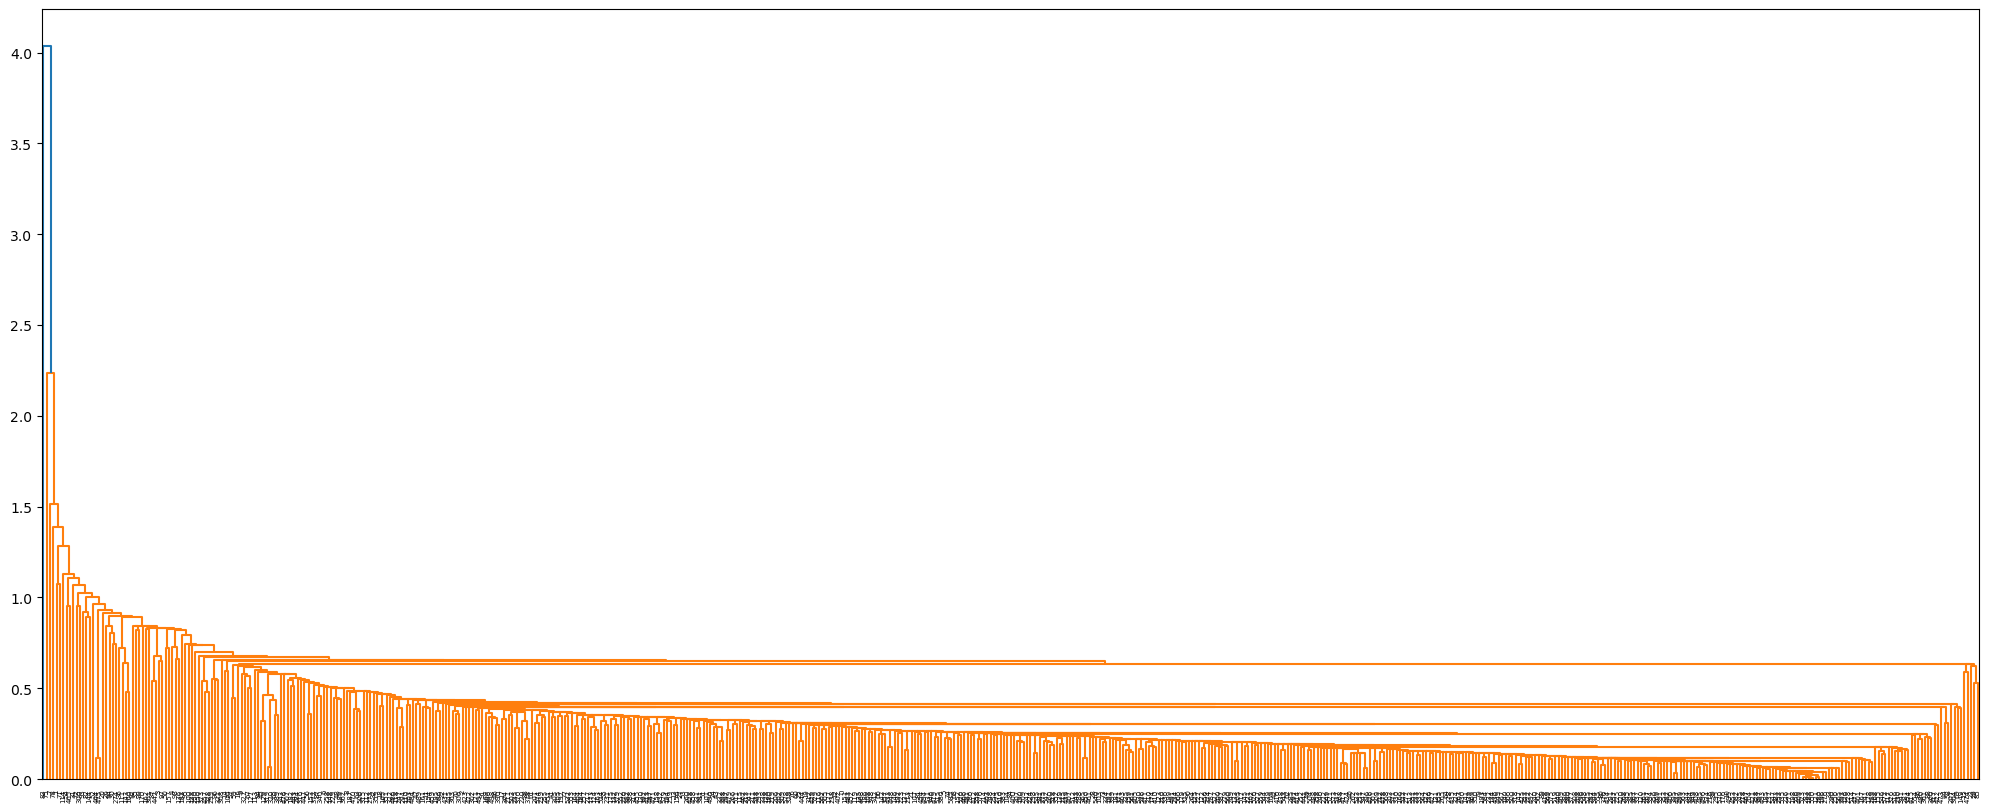

In [16]:
from scipy.cluster import hierarchy
# cluster the proj_weights
# make a distance matrix between the neurons based on their weights
dists = np.zeros((proj_weights.T.shape[0], proj_weights.T.shape[0]))
for i in range(proj_weights.T.shape[0]):
    for j in range(proj_weights.T.shape[0]):
        dists[i,j] = np.sum(np.abs((proj_weights.T[i] - proj_weights.T[j])))

Z = hierarchy.linkage(dists, 'single')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z)

In [6]:
# what relationship do channels have to filters in projection layer


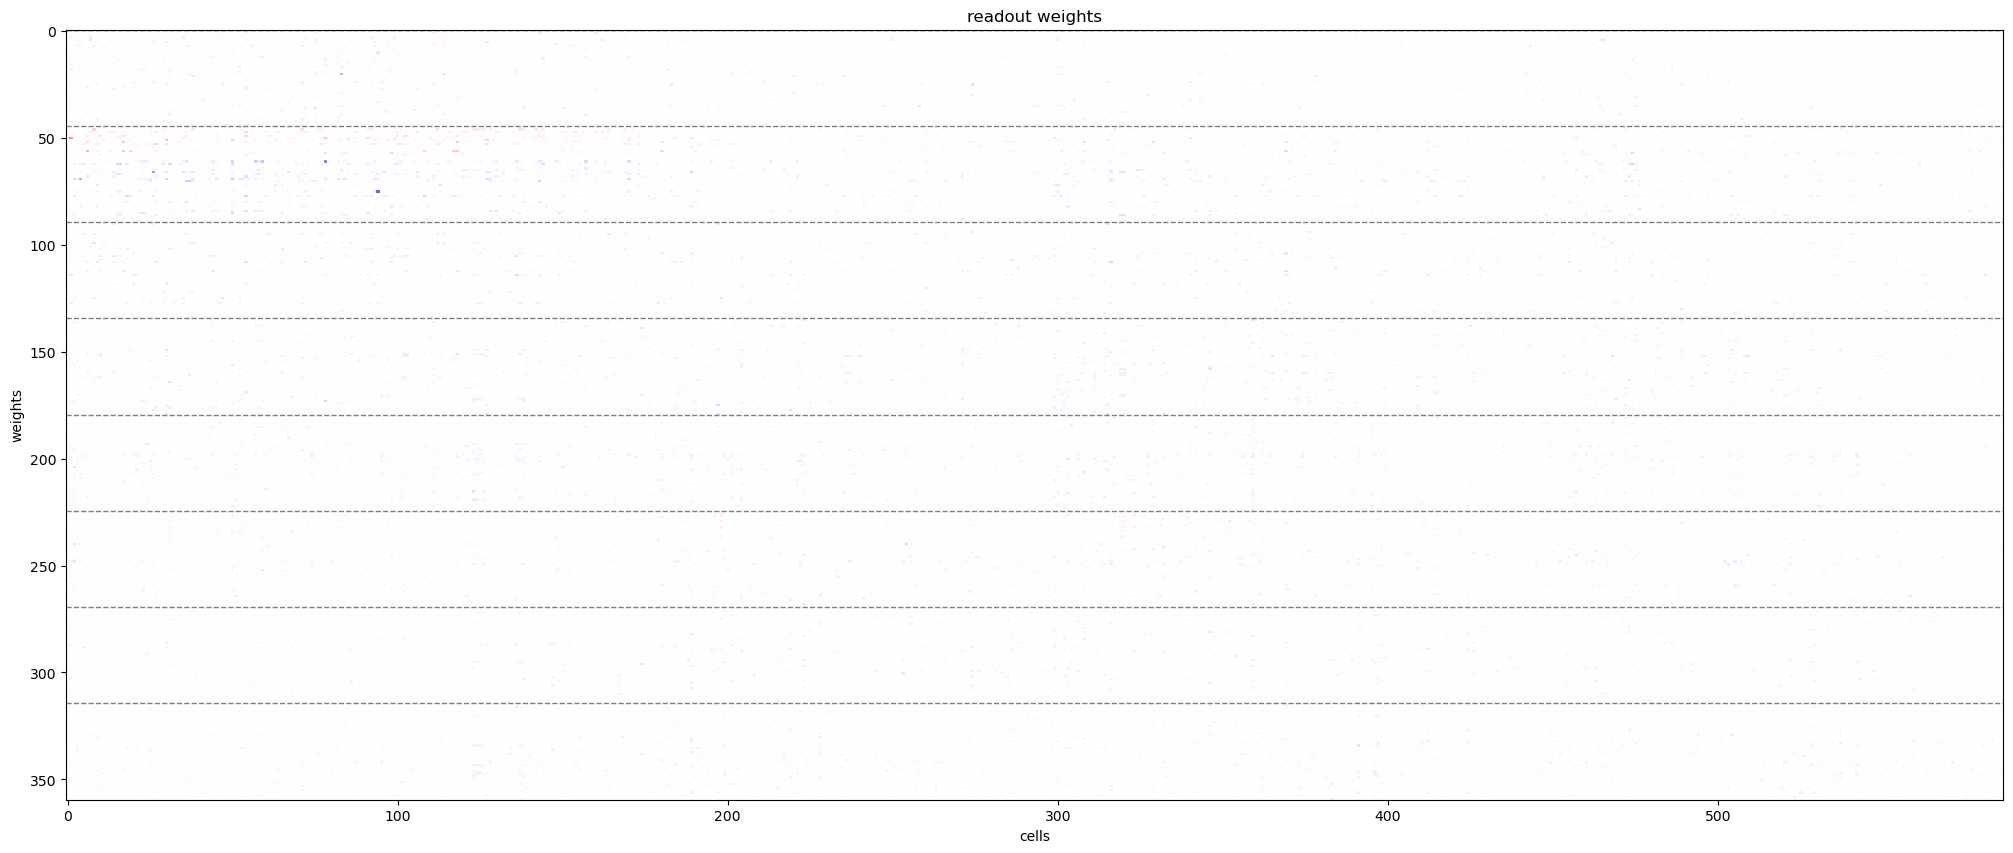

In [2]:
mplt.plot_readout_weights(iter_core.ndn_model)

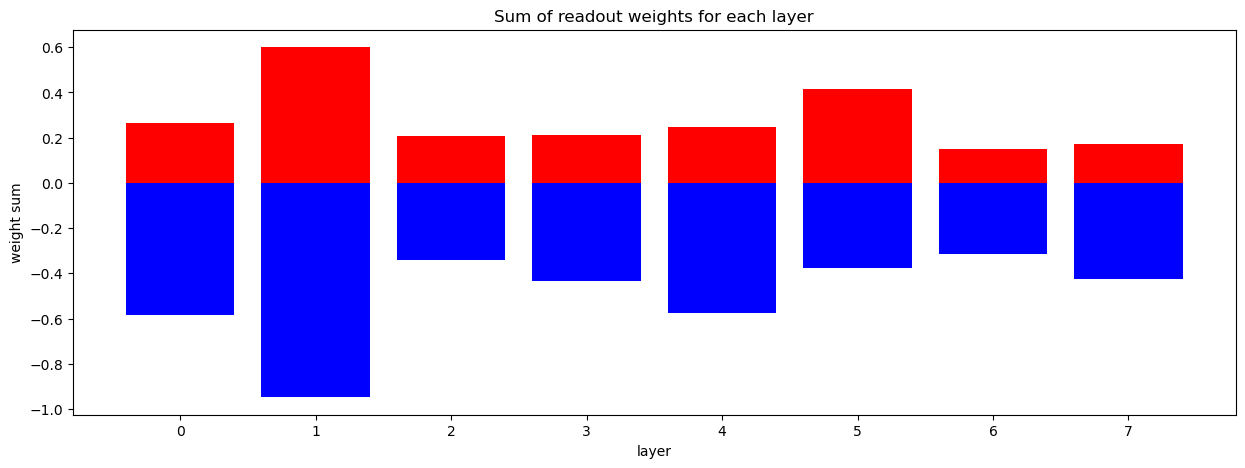

In [4]:
mplt.plot_exc_inh(iter_core.ndn_model)

# computations per channel